In [2]:
from pylab import *
%run integradores.ipynb
%matplotlib inline

Primero, programo la ecuación dada en la siguiente función

In [3]:
inicial = [1,2,1]
dominio = [[1,1.9],[1,2.1]]

def ecuacion(y,t):
    y_3dot = exp(-t)*sin(3*t) - cos(y[0])*cos(y[0]) + 3*y[1]*y[1]*y[1] - y[2]*y[2]
    return array([y[1],y[2],y_3dot])

Después de algunos problemas al momento de integrar la solución, descubrí que la ecuación tiene una singularidad en $x=2$, de manera que mientras el integrador se acerca a este punto, necesita una $h$ cada vez más pequeña para lograr una solución, para no ''explotar''.

A continuación, ejemplifico esto usando el método de Runge-Kutta.

In [13]:
t1,sol1 = int_rk4(ecuacion,inicial,[1,1.87],h=0.001)

Integrando de $1.00$ a $1.87$, llegamos sin problema a una solución.

In [6]:
t,sol = int_rk4(ecuacion,inicial,[1,1.90],h=0.001)

/home/jz/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in double_scalars
/home/jz/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in cos


Usando el mismo paso, pero extendiendo la integración hasta $1.90$, 
Python me arroja una adevertencia de _overflow_ y una subsecuente sobre un valor inválido en un coseno;
seguramente el $\cos(y)^{2}$ que es parte de nuestra ecuación diferencial

In [14]:
t2,sol2 = int_rk4(ecuacion,sol1[-1],[1.87,1.970],h=0.000001)

Ahora, reduciendo el paso de integración $h$ por tres ordenes de magnitud, podemos extender la solución hasta $x=1.970$

A continuación, gráfico ambas partes de la solución para ver como nos acercamos al punto de ''explosión''.

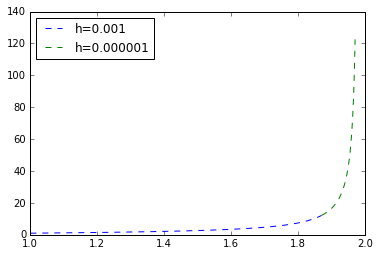

In [17]:
plot(t1,sol1[:,0],"--", label="h=0.001")
plot(t2,sol2[:,0],"--", label="h=0.000001")
plt.legend(loc="best")